# Plotting and Visualization

---

- Introduction to Python Data Visualization Landscape
    - [PyDataViz](https://pyviz.org/tools.html)
    - Notable mentions
        - Seaborn for powerful statistical visualizations
        - Altair (or Plotly) for interactive visualizations
        - Streamlit (or Dash) for making data apps or dashboards

- Data for Visualization
    - from `scikit-learn` for example, `sklearn.datasets.load_wine()` which returns a `dict`
    - from `seaborn` for example, `sns.get_dataset_names()` and then `sns.load_dataset('dowjones')`

- Interactive Data Visualization using IPython Widgets

- Elements of a Plot
    - Figure - size, quality
    - Plots (Subplots) - how many, sharing axes, title 
    - Axes - ticks, labels, limits
    - Markers - shapes used for representing of data 
    - Lines - additional information overlay
    - Legend

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import Dropdown, IntSlider, interact, fixed

sns.set_style('whitegrid')
sns.set_context('notebook')

plt.rcParams['figure.figsize'] = 12, 5
plt.rcParams['font.family'] = 'monospace'

path_root_dir = Path(os.getcwd()).parent
path_data = f"{path_root_dir}/data"

---
## 1. matplotlib basics


http://matplotlib.org/

* Run **`import matplotlib.pyplot as plt`**
* Create a figure object using **`plt.figure`** or **`plt.subplots`**
* Add subplots to it using **`add_subplot`**
    * This creates **AxesSubplot** objects on which you can place plots
* Use a plotting command like **`plt.plot`** and matplotlib will place your plot on this canvas

---
## A Basic Plot

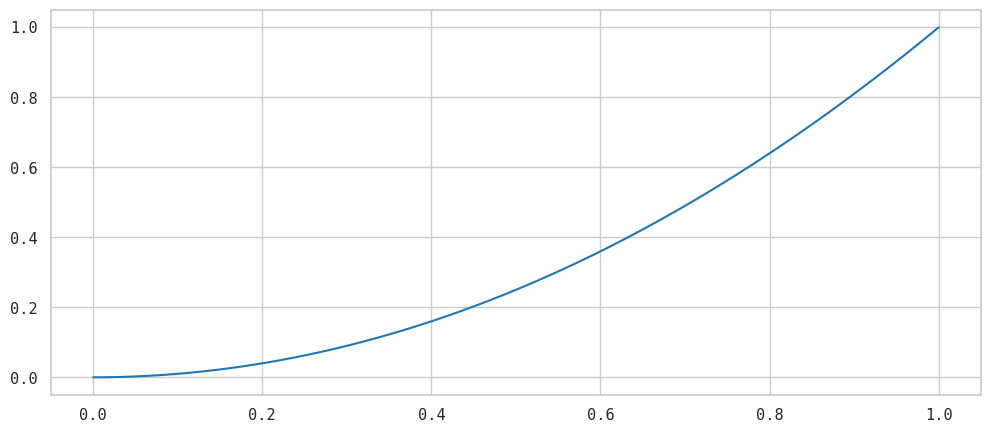

In [23]:
x = np.linspace(0, 1, 100)
y = x ** 2

plt.plot(x, y)

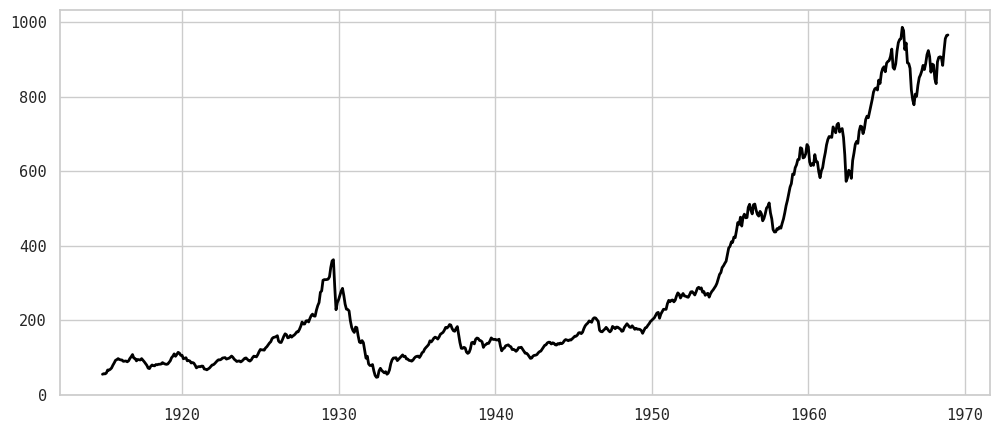

In [28]:
df_dowjones = sns.load_dataset('dowjones')
plt.plot('Date', 'Price', data=df_dowjones, c='k', linewidth=2)

---
## Figure, Subplots, AxisSubplot objects and your plot

### Create a 2x2 figure and add three plots to it

In [49]:
# Create an empty figure
fig = plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

In [51]:
# Run plt.figure? to check out figure options like size, dpi, color

axsp1 = fig.add_subplot(2, 2, 1)
# There will be 2 x 2 subplots on the figure and axsp1 will put your plot on subplot 1

axsp2 = fig.add_subplot(2, 2, 2)
axsp3 = fig.add_subplot(2, 2, 3)
axsp4 = fig.add_subplot(2, 2, 4)
# Now, we have three AxesSubplot objects on our figure. 

In [54]:
# First plot: timeseries
axsp1.plot(np.random.randn(40).cumsum(), 'r--')

# Second plot: histogram
axsp2.hist(np.random.randn(400), bins=10, color='b', alpha=0.3)


(array([  2.,   5.,  16.,  45.,  66., 110.,  74.,  43.,  27.,  12.]),
 array([-2.82761726, -2.3184966 , -1.80937595, -1.30025529, -0.79113464,
        -0.28201398,  0.22710667,  0.73622733,  1.24534798,  1.75446864,
         2.26358929]),
 <BarContainer object of 10 artists>)

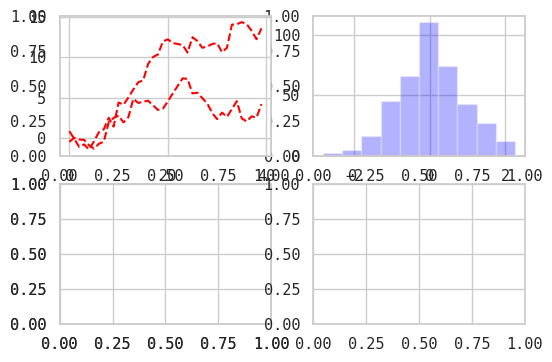

In [55]:
fig

------------------------------------------------------------------------------------------------------------------------

### 1.2 Shorthand to achieve the same effect

* Create a grid figure using **`plt.subplots`**
    * Syntax: `fig, axes = plt.subplots(rows, cols, figsize = (width, height), sharex=False, sharey=False)`
    
* It returns an array of **AxisSubplot** objects 
* Reference them using basic indexing (Saves typing!)

`plt.subplots` has some interesting options such as `sharex/sharey` which are useful when comparing data on the same scale

Run `plt.subplots?` for more.

/var/folders/lh/qf1ndf5d333cchqn23zk7mj40000gp/T/ipykernel_26202/1577404710.py:4: RuntimeWarning: divide by zero encountered in log10
  axes[2, 1].scatter(np.arange(30), np.log10(np.arange(30)))


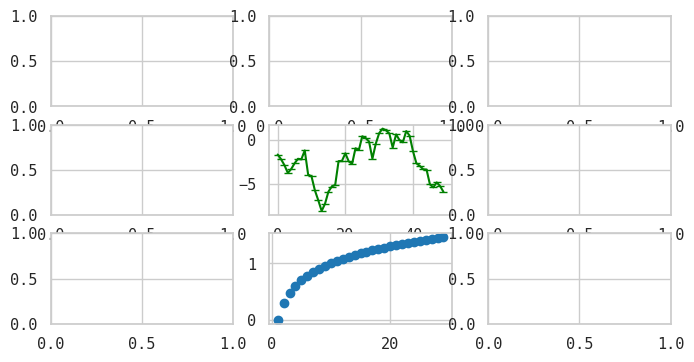

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(8, 4))

axes[1, 1].plot(np.random.randn(50).cumsum(), 'g-_')
axes[2, 1].scatter(np.arange(30), np.log10(np.arange(30)))

> NOTE:
`subplots.adjust` is a Figure method that can be used to adjust figure parameters like spacing between subplots

In [ ]:
fig1, axes1 = plt.subplots(2, 2, figsize=(12, 4), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes1[i, j].hist(np.random.randn(500), bins=15, alpha=0.4, color='c')

plt.subplots_adjust(wspace=0.2, hspace=0.2)        
# comment out the plt.subplots line and re-run. See what happens

------------------------------------------------------------------------------------------------------------------------

### 1.3 Plot Formatting

#### a. Color, Linestyle and Markers

The `plot` function takes `x, y` and optionally an abbreviation to specify `marker, color, and style`

Example: Abbreviations work as `color-marker-style`, so `'g--'` means color = 'green' and linestyle = '--'

In [ ]:
plt.plot(np.sin(np.arange(50)), 'b*-');

#### b. Ticks, Labels, Legends

In [ ]:
f = plt.figure(figsize=(8, 5))
ax1 = f.add_subplot(1, 1, 1)
ax1.plot(4 + 6 * np.sin(np.arange(50)), 'g*-');

In [ ]:
# Ticks
ax1.set_xticks([5, 15, 25, 35, 45])

# Chart title
ax1.set_title('This is a Sine Curve')

# Axis Label
ax1.set_xlabel('X')
ax1.set_ylabel('4 + 6 * sin(X)')

f

In [ ]:
# Add more plots
ax1.plot(np.log(np.arange(50)), 'r', label='log(x)')
ax1.plot(np.sqrt(np.arange(50)), 'b*--', label='sqrt(x)')

# Add a legend
ax1.legend(loc='best')

f

### 1.3 Saving plots to file

**Syntax**: `plt.savefig('file-path.extension', dpi=)`

------------------------------------------------------------------------------------------------------------------------

In [ ]:
Series.plot.
DataFrame.plot.

# 2. Plotting in `pandas`

* There are high level plotting methods that take advantage of the fact that data are organized in DataFrames (have index, colnames)
* Both `Series` and `DataFrame` objects have a `pandas.plot` method for making different plot types
* Other parameters that can be passed to `pandas.plot` are:
    * `xticks, xlim, yticks, ylim`
    * `label`
    * `style` (as an abbreviation,) and `alpha`
    * `grid=True`
    * `rot` (rotate tick labels by and angle 0-360)
    * `use_index` (use index for tick labels)
    * `subplots=False`

### 2.1 One variable (plotting a Series)

In [ ]:
pd.Series.plot.

<big> 

Two ways of specifying the kind of plot to make

- `X.plot(kind=<plottype>`
- `X.plot.<plottype>`

Where X is a Series or a DataFrame

---

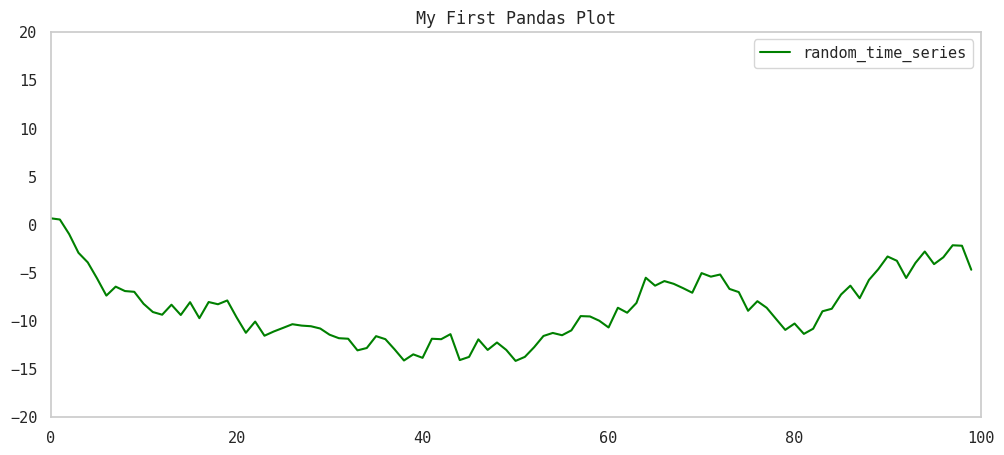

In [11]:
s.plot(legend=True, 
       title='My First Pandas Plot',
       xlim=(0, 100), 
       grid=False,
       ylim=(-20, 20), 
       style='g');


<Axes: title={'center': 'My First Pandas Plot'}>

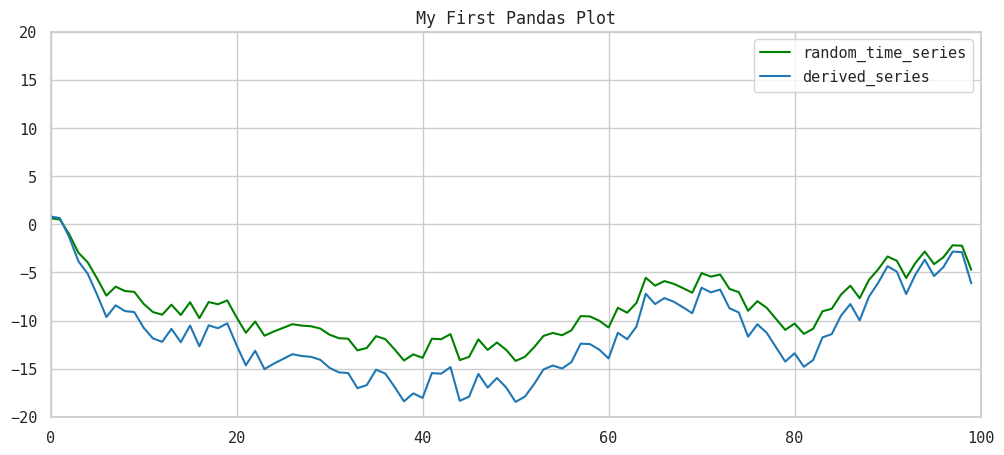

In [14]:
ax_1 = s.plot(legend=True, 
       title='My First Pandas Plot',
       xlim=(0, 100), 
       ylim=(-20, 20), 
       style='g');

s2 = s * 1.3
s2.name = 'derived_series'
s2.plot(legend=True, ax=ax_1)

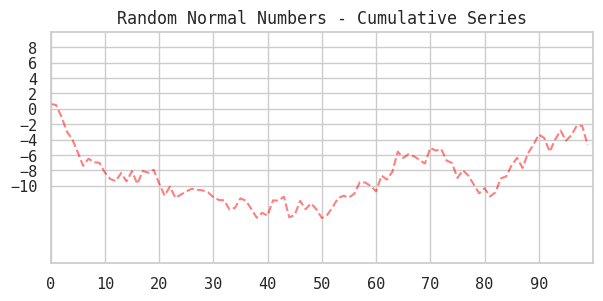

In [18]:
# Chart with options
s.plot(grid=True, 
       legend=False,
       label='timeseries',
       title='Random Normal Numbers - Cumulative Series',
       xlim=(0, 100), 
       ylim=(-20, 10),
       xticks=np.arange(0, 100, 10), 
       yticks=np.arange(-10, 10, 2),
       style='r--', 
       alpha=0.5,
       figsize=(7, 3)
      );

plt.savefig('time_series_001.png', dpi=200)

In [ ]:
ls | grep _001

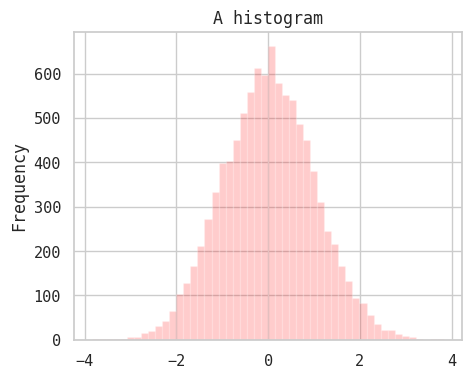

In [23]:
# One Variable as a Histogram
pd.Series(np.random.randn(10000)).plot.hist( 
                                    bins=50, 
                                    color='r', 
                                    alpha=0.2, 
                                    figsize=(5, 4),
                                    title='A histogram');

In [24]:
from scipy.stats import norm

s2 = norm.rvs(size=10000, loc=4, scale=2.5)
s3 = norm.rvs(size=10000, loc=-2, scale=0.5)

<Axes: ylabel='Frequency'>

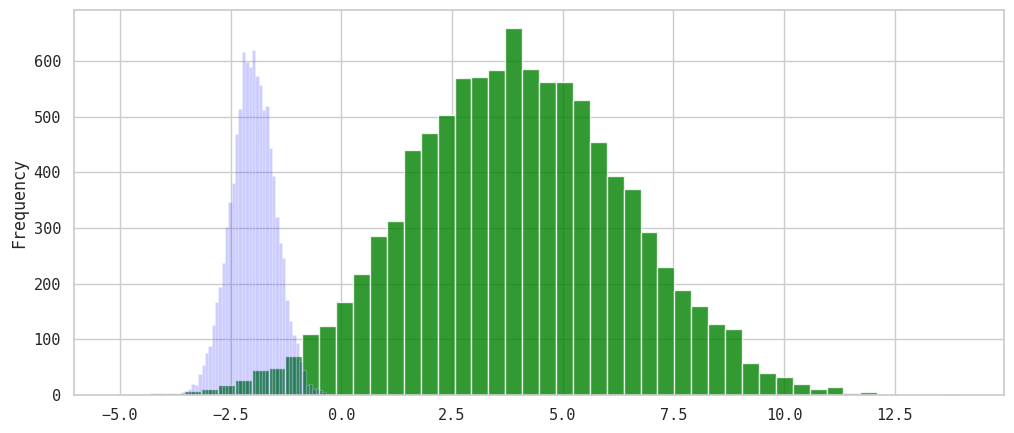

In [28]:
ax_green = pd.Series(s2).plot.hist(bins=50, color='g', alpha=0.8)
pd.Series(s3).plot(kind='hist', bins=50, color='b', alpha=0.2, ax=ax_green)

<Axes: >

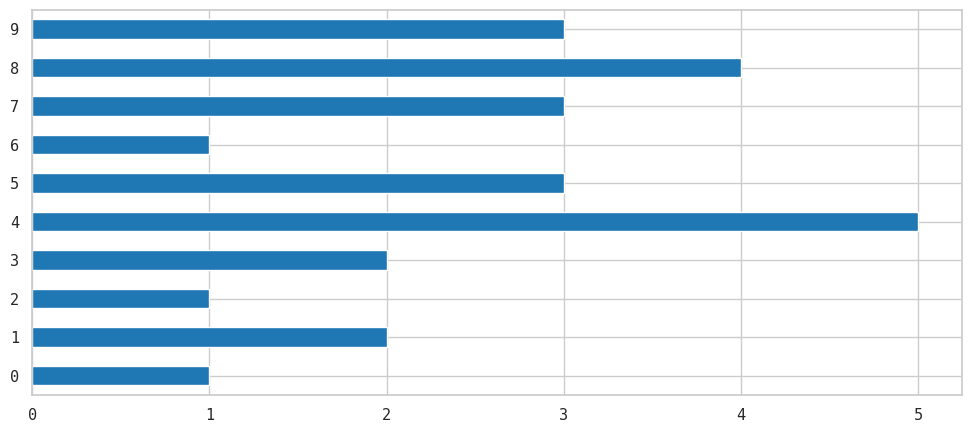

In [30]:
(pd.Series(np.random.randint(0, 10, 25)).value_counts().sort_index().plot.barh())

## Plotting with Titanic

In [33]:
df = pd.read_csv('titanic.csv')

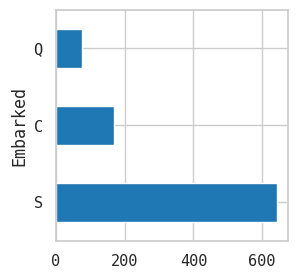

In [35]:
df['Embarked'].value_counts().plot.barh(figsize=(3, 3));

<Axes: ylabel='Frequency'>

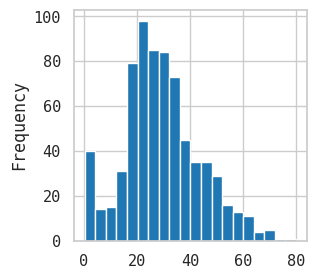

In [36]:
df['Age'].plot.hist(bins=20, figsize=(3, 3))

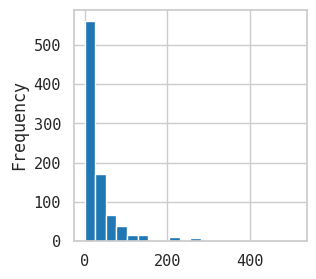

In [37]:
df['Fare'].plot.hist(figsize=(3, 3), bins=20);

------------------------------------------------------------------------------------------------------------------------

### 2.2 Multiple Variables (plotting a DataFrame)

We can choose between plotting
* All Variables on one plot
* Each variable on a separate plot

In addition to the parameters above, `DataFrame.plot` also takes
* `subplots=False` (default is to plot all on the same figure)
* `sharex=False, sharey=False`
* `figsize`
* `title, legend`
* `sort_columns`

### a. Variables on the same plot

In [42]:
df = pd.DataFrame(np.random.randn(5000, 5), 
               index=['Day_' + str(d) for d in range(5000)],
               columns=['APL', 'FBK', 'GOOG', 'MCRS', 'TWTR']).cumsum().round(3); 
display(df[:4])
print(df.shape)

,APL,FBK,GOOG,MCRS,TWTR
Day_0,1.354,1.149,-0.328,-0.077,-0.719
Day_1,0.156,1.904,-2.312,0.642,0.820
Day_2,-0.183,2.812,-2.925,1.651,-0.582
Day_3,-0.473,3.006,-3.378,2.748,-0.469


(5000, 5)


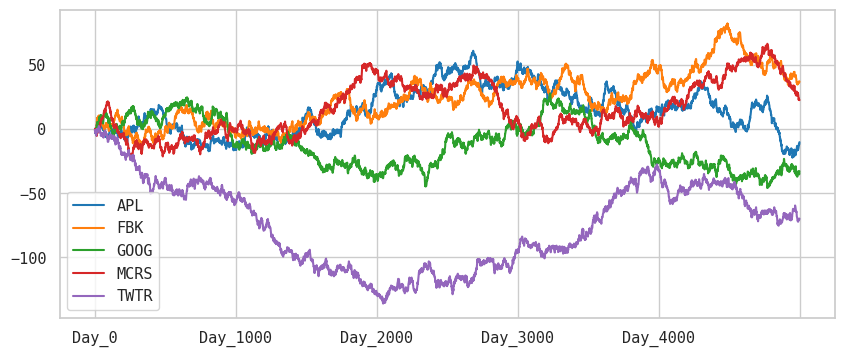

In [40]:
# Default plot
df.plot(figsize=(10, 4));

------------------------------------------------------------------------------------------------------------------------

### b. Each variable on its own plot

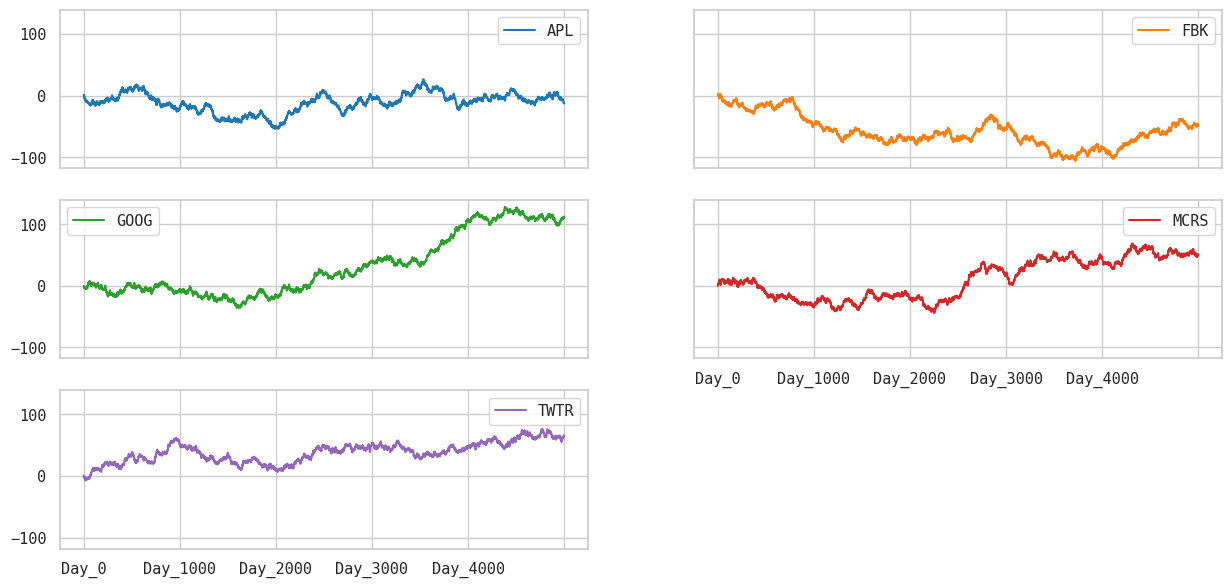

In [48]:
df.plot(subplots=True, sharey=True, layout=(3, 2), figsize=(15, 7));

In [ ]:
df.plot(figsize=(5, 10), subplots=True, sharey=True);

## Visualizing Rainfall in Himachal

#### Data from $data.gov.in$

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://data.gov.in/node/87154/datastore/export/csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 19


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
(df['STATE/UT'] == 'HIMACHAL').value_counts()

In [158]:
df.loc[(df['STATE/UT'] == 'HIMACHAL'), 'DISTRICT']

336         BILASPUR
337           CHAMBA
338           KANGRA
339          KINNAUR
340            KULLU
341    LAHUL & SPITI
342            MANDI
343         HAMIRPUR
344           SHIMLA
345          SIRMAUR
346            SOLAN
347              UNA
Name: DISTRICT, dtype: object

In [161]:
df_1 = (df[df['STATE/UT'] == 'HIMACHAL']
 .set_index('DISTRICT')
 .drop('STATE/UT', axis=1)
 .loc[:, 'JAN':'DEC'] 
 .T)

In [162]:
df_1

DISTRICT,BILASPUR,CHAMBA,KANGRA,KINNAUR,KULLU,LAHUL & SPITI,MANDI,HAMIRPUR,SHIMLA,SIRMAUR,SOLAN,UNA
JAN,62.5,126.2,83.0,102.1,86.9,132.8,71.1,73.0,69.1,58.4,71.7,46.3
FEB,66.8,112.8,80.2,107.8,97.0,137.1,67.5,61.4,70.3,53.3,66.1,45.1
MAR,54.0,120.3,84.9,113.9,135.2,176.6,81.7,59.1,80.0,42.4,62.6,40.9
APR,26.1,51.2,39.9,77.4,79.5,108.9,48.3,27.1,48.3,20.4,27.9,17.2
MAY,41.1,53.4,45.1,69.4,72.1,91.7,64.3,42.7,65.0,31.9,48.8,26.8
JUN,107.4,132.4,145.6,37.1,82.4,52.4,160.1,143.3,104.7,140.9,130.3,67.6
JUL,311.8,567.3,583.2,75.0,184.8,164.5,411.2,384.8,226.9,508.0,368.4,340.0
AUG,304.2,479.2,619.4,81.3,165.9,139.9,370.1,391.2,189.0,485.6,331.8,310.3
SEP,153.6,227.5,233.9,70.8,86.6,101.4,152.0,159.6,113.3,190.1,169.6,144.8
OCT,27.0,48.7,48.1,35.4,32.0,52.2,34.4,41.1,32.6,44.0,44.1,32.1


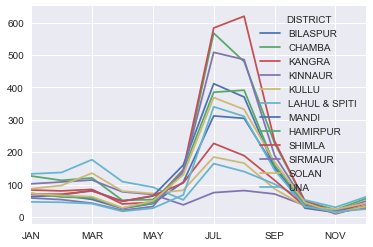

In [163]:
df_1.plot()

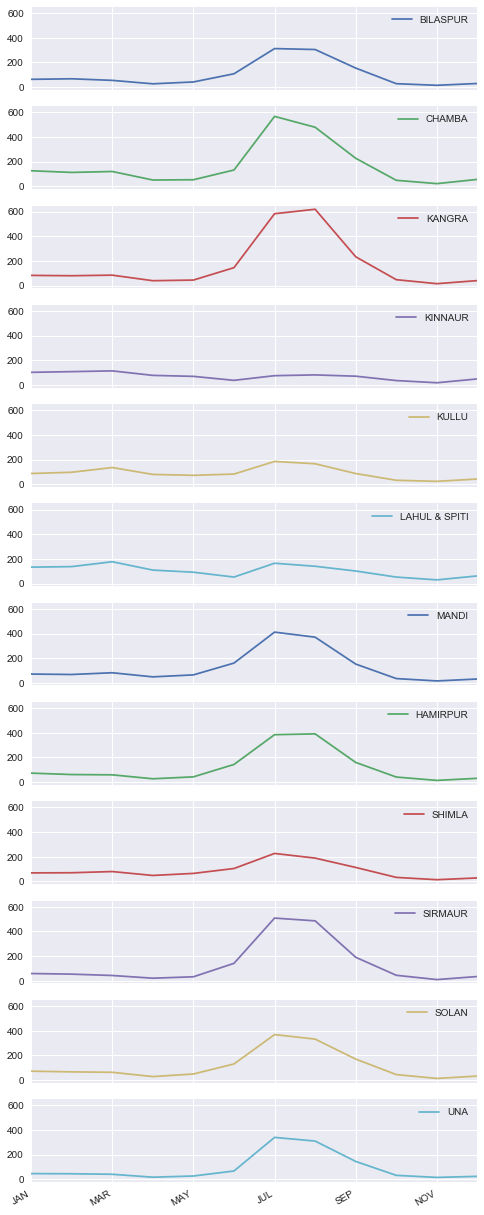

In [164]:
(df_1.plot(subplots=True, sharey=True, figsize=(8, 24)));

In [166]:
df_1.corr()

DISTRICT,BILASPUR,CHAMBA,KANGRA,KINNAUR,KULLU,LAHUL & SPITI,MANDI,HAMIRPUR,SHIMLA,SIRMAUR,SOLAN,UNA
DISTRICT,,,,,,,,,,,,
BILASPUR,1.000000,0.988558,0.992435,0.192935,0.839746,0.503313,0.990073,0.995787,0.974451,0.993413,0.997512,0.991833
CHAMBA,0.988558,1.000000,0.985371,0.248054,0.870344,0.573849,0.984134,0.983056,0.972606,0.986384,0.989790,0.992409
KANGRA,0.992435,0.985371,1.000000,0.174594,0.831278,0.495436,0.985011,0.994762,0.953121,0.995925,0.988605,0.993745
KINNAUR,0.192935,0.248054,0.174594,1.000000,0.612428,0.907623,0.174051,0.153474,0.302718,0.121861,0.168843,0.160228
KULLU,0.839746,0.870344,0.831278,0.612428,1.000000,0.856776,0.859097,0.828668,0.908186,0.810399,0.835235,0.819024
LAHUL & SPITI,0.503313,0.573849,0.495436,0.907623,0.856776,1.000000,0.504608,0.472198,0.605482,0.454030,0.491729,0.492598
MANDI,0.990073,0.984134,0.985011,0.174051,0.859097,0.504608,1.000000,0.993637,0.982498,0.990538,0.993608,0.981840
HAMIRPUR,0.995787,0.983056,0.994762,0.153474,0.828668,0.472198,0.993637,1.000000,0.966992,0.996642,0.995376,0.988321
SHIMLA,0.974451,0.972606,0.953121,0.302718,0.908186,0.605482,0.982498,0.966992,1.000000,0.957485,0.978571,0.955509


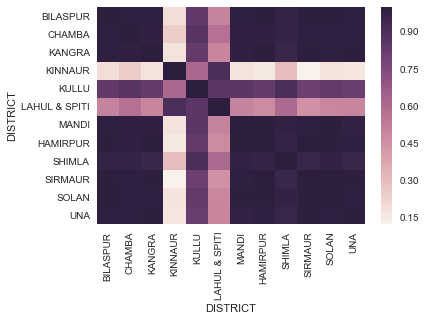

In [165]:
sns.heatmap((df[df['STATE/UT'] == 'HIMACHAL']
 .set_index('DISTRICT')
 .drop('STATE/UT', axis=1)
 .loc[:, 'JAN':'DEC'].T).corr())

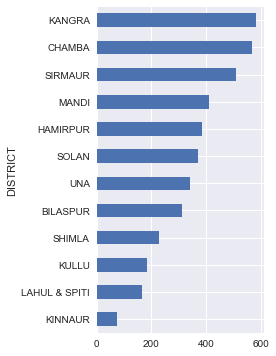

In [167]:
(df[df['STATE/UT'] == 'HIMACHAL']
 .set_index('DISTRICT')
 .drop('STATE/UT', axis=1)
 .loc[:, 'JUL']).sort_values().plot.barh(figsize=(3, 6));

In [168]:
df2 = (df[df['STATE/UT'] == 'HIMACHAL']
 .set_index('DISTRICT')
 .drop('STATE/UT', axis=1)
 .loc[:, 'JAN':'DEC']).loc[:, 'JUL':'AUG']

In [169]:
x = range(0, df2.shape[0])

In [170]:
df2

,JUL,AUG
DISTRICT,,
BILASPUR,311.8,304.2
CHAMBA,567.3,479.2
KANGRA,583.2,619.4
KINNAUR,75.0,81.3
KULLU,184.8,165.9
LAHUL & SPITI,164.5,139.9
MANDI,411.2,370.1
HAMIRPUR,384.8,391.2
SHIMLA,226.9,189.0


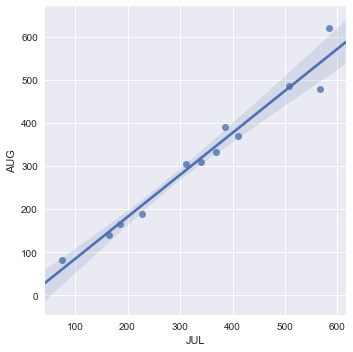

In [171]:
sns.lmplot(x='JUL', y='AUG', data=df2);

In [ ]:
df2.plot.scatter(x='JUL', y='AUG', c=x, cmap="Spectral")

### c. Barplots

This is as simple as passing `kind=bar` or `kind=barh` (for horiz bars) to `pd.plot`

#### One Variable (simple barplot)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(14, 14))
s = Series(np.random.rand(10), index=list('abcdefghij'))

s.plot(kind='bar', 
       ax=axes[0], 
       color='k', 
       alpha=0.6)

s.plot(kind='barh', 
       ax=axes[1], 
       color='k')

s.plot(
    ax=axes[2], 
    color='g')

In [ ]:
df = DataFrame(np.random.rand(5,5), index=list('ABCDE'), columns=list('PQRST'))
print df

In [ ]:
df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.savefig('stackedBarcharts.jpeg')

> Note: Functions `value_counts()` and `pd.crosstab()` prove helpful to prepare data for stacked bar charts

------------------------------------------------------------------------------------------------------------------------

### d. Histograms & Density Plots

* _Histograms_: Pass `kind='hist'` to `pd.plot()` or use the method `pd.hist()`
* _Density Plots_: Use `kind='kde'`


### Using the `.hist()` method

In [ ]:
Series(np.random.randn(1000)).hist(bins=20, alpha=0.4)

### Using the `.plot()` method

In [ ]:
Series(np.random.randn(1000)).plot(kind='hist', bins=20, color='Y')

### KDE

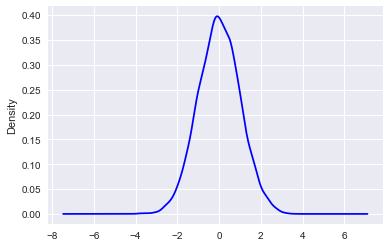

In [172]:
s = Series(np.random.randn(10000))
s.plot(kind='kde', color='b') 

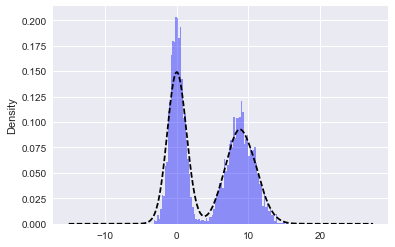

In [173]:
# A bimodal distribution 
s1 = np.random.normal(0, 1, 2000)
s2 = np.random.normal(9, 2, 2000)

v = Series(np.concatenate([s1, s2]))

v.hist(bins=100, alpha=0.4, color='B', normed=True)
v.plot(kind='kde', style='k--')

------------------------------------------------------------------------------------------------------------------------

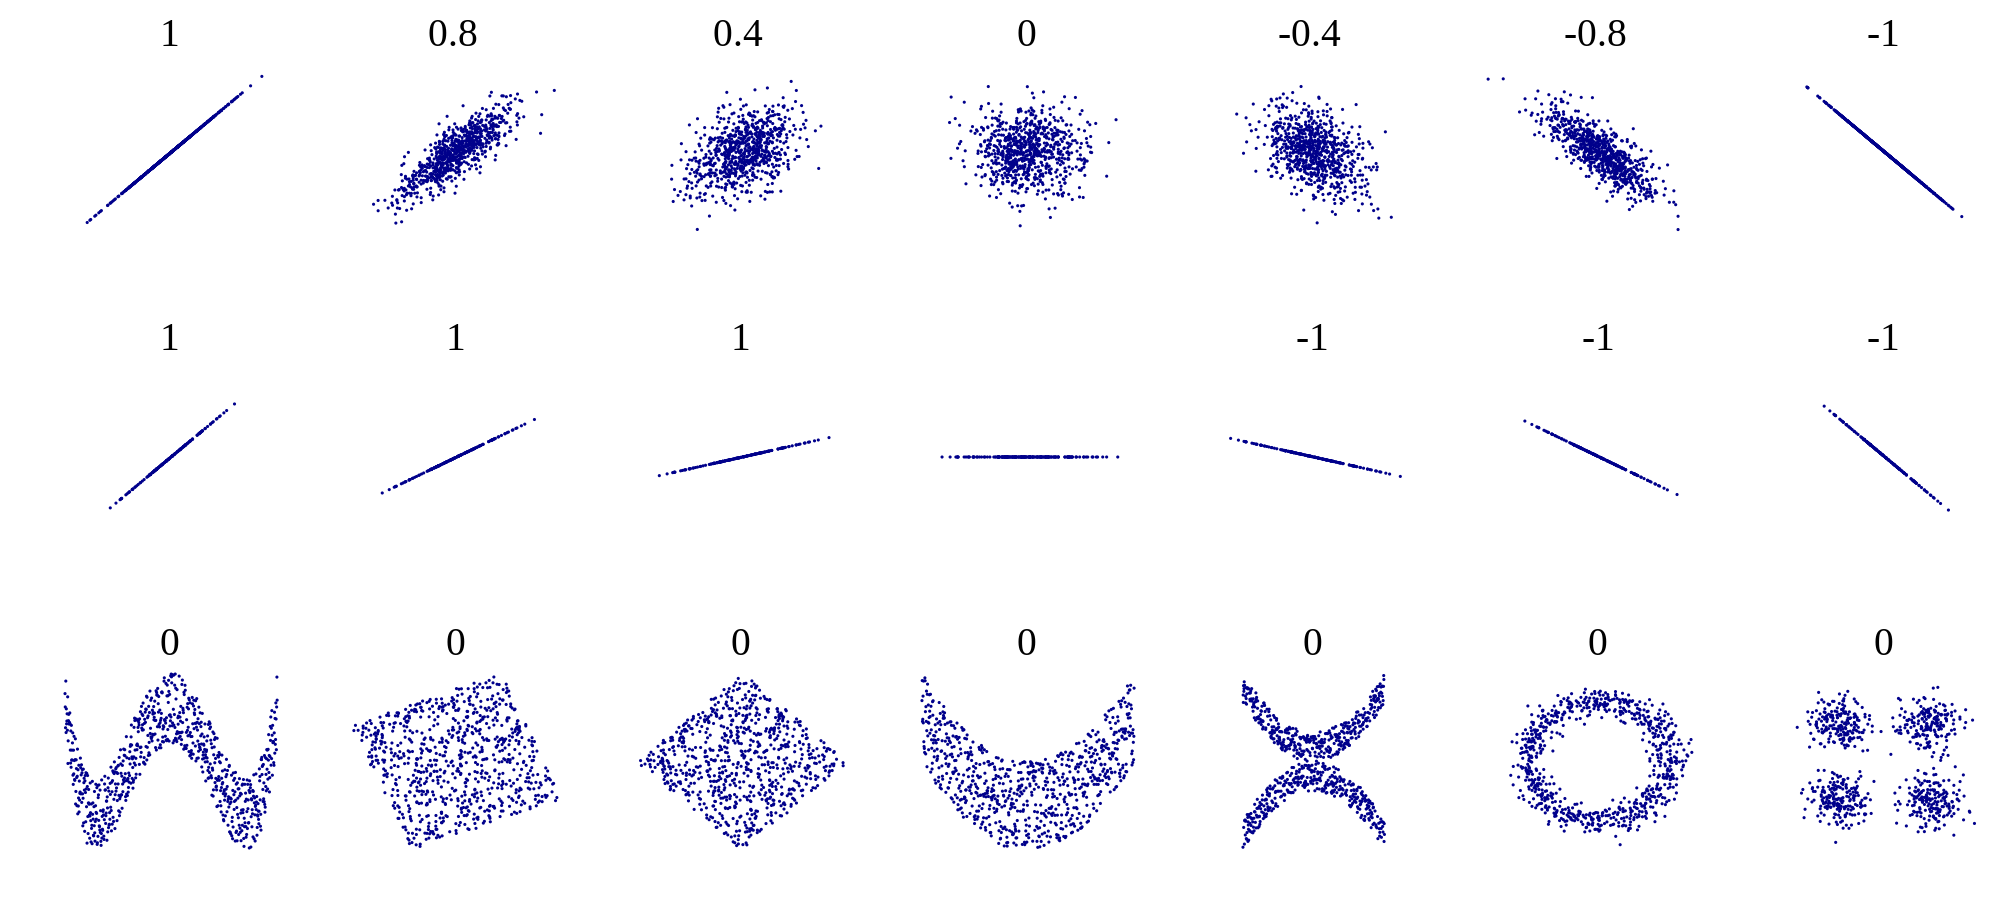

In [174]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2000px-Correlation_examples2.svg.png")

# e. Scatter Plots

- `.plot(kind='scatter')`
- `.scatter()`

In [ ]:
df = DataFrame({'A': np.arange(50),
               'B': np.arange(50) + np.random.randn(50),
               'C': np.sqrt(np.arange(50)) + np.sin(np.arange(50)) })
print df[:10]

In [ ]:
# Two variable Scatterplot
plt.scatter(df['B'], df['C'])
plt.title('Scatterplot of X and Y')

In [ ]:
df.plot(kind='scatter', x='B', y='C', title = 'Scatterplot')

In [ ]:
df.plot.scatter(x='B', y='C', title = 'Scatterplot', color='r')

## Scatterplot Matrix

A MOST important visual that allows you to see, for numeric variables:

- The distribution of each (histograms or kde along the diagonal)
- The relationships between variables (as pairwise scatterplots)

In [ ]:
df = pd.read_csv('https://data.gov.in/node/87154/datastore/export/csv')

In [ ]:
pd.scatter_matrix(df.loc[df['STATE/UT'] == 'HIMACHAL', 'JAN':'JUL'], alpha=0.5, figsize=(12, 6))
tight_layout()

In [ ]:
pd.scatter_matrix(df, diagonal='kde', color='k', alpha=0.5, figsize=(12, 6))
tight_layout()

------------------------------------------------------------------------------------------------------------------------

# _Split - Apply - Combine_

## Advanced GroupBy

In Data Analysis workflows, operations like `loading, cleaning and merging` are usually following by `summarizations` using some grouping variable(s). This includes _summary statistics_ over variables or groups within variables, within-group _transformations_ (like variable standardization), computing _pivot-tables_ and group analyses.

* _Split:_
    * A DataFrame can be split up by rows(`axis=0`)/columns(`axis=1`) into **groups**. 
    * We use `pd.groupby()` to create a groupby object
* _Apply:_
    * A function is applied to each group.
* _Combine:_
* The results of applying functions to groups are put together into an object 
    * data types of returned objects are handled gracefully by pandas
    


In [ ]:
df.groupby('STATE/UT').apply(lambda g: g.loc[:, 'JAN':'DEC'].median()).T.head()

In [ ]:
df_rainfall = df.copy()

In [ ]:
df = DataFrame({'k1': list('abcd' * 25),
               'k2': list('xy' * 25 + 'yx' * 25),
               'v1': np.random.rand(100),
               'v2': np.random.rand(100)}); df[:15]

#### Syntax

`df.groupby('[<col-name(s)>]').apply(<udfs>) or <existing-function>`

### Grouping by one key 

**Results in a summarized data frame indexed by levels of the key**

In [ ]:
print '\n', df.groupby('k1').mean()
print '\n', df.groupby('k2').sum()

### Grouping by two keys

**Results in a summarized data frame with a hierarchical index**

In [ ]:
print df.groupby(['k1', 'k2']).mean()

In [ ]:
grpd = df.groupby(['k1', 'k2'])

In [ ]:
type(grpd)

In [ ]:
print grpd['v1'].sum()
print
print grpd['v2'].median()

In [ ]:
grpd.agg?

In [ ]:
grpd.agg({'v1': 'mean',
          'v2': 'sum'})

In [ ]:
all(grpd['v1'].sum() == grpd['v1'].apply(np.sum))

---
# ** GroupBy objects **

* `DataFrame.groupby(<key>)` will produce a groupby object
* have a `.size()` method, which returns the count of elements in each group.
* can be subsetted using column names (or arrays of column names) to select variables for aggregation
* have optimized methods for general aggregation operations like - 
    * `count, sum`
    * `mean, median, std, var`
    * `first, last`
    * `min, max`
* methods like `.describe` apply to these objects

** By far, the most important GroupBy methods are `.agg() .transform()`, and `.apply()` **

In [ ]:
rain_grpby = df_rainfall.groupby('STATE/UT')

In [ ]:
rain_grpby.size().sort_values(ascending=False)[:5]

In [ ]:
obj = df.groupby(['k1'])

In [ ]:
obj

In [ ]:
obj.size()

In [ ]:
print obj.mean()

### Groupby objects Methods

In [ ]:
obj.agg?

---
### Task 1: 

1. Create a 100x4 DataFrame filled with random numbers (from a normal distribution.)
Ensure that there's 2 categorical columns with 5 and 3 categories each.

2. Create the groupby object using both keys and find the mean, max, median for each group.

---

### 9.1 Column-wise aggregations and UDFs

** For simple aggregations (Series or all numeric columns of a DataFrame) we can call methods like `mean` and `sum` **

In [ ]:
# Summing a Series
# Syntax: Select a Series - GroupBy - Apply function
df.groupby('k1')['v1'].sum()

In [ ]:
# Summing all Series of a DataFrame
# Syntax: Select DF - Groupby - Apply
print df.groupby('k2').mean()

** or you can pass the name of a function as a string with the `.agg()` method **

In [ ]:
df.groupby('k1')['v1'].agg('sum')

In [ ]:
print df.groupby('k1').agg('mean').add_prefix('mu_')

In [ ]:
pd.concat([df.groupby(df.k1).agg('mean').add_prefix('mu_'),
           df.groupby(df.k1).agg('std').add_prefix('sigma_')], axis=1)

---
### The `.agg()` method

takes as argument the following:
* list of function names to be applied to all selected columns
* tuples of (colname, function) to be applied to all selected columns
* dict of (df.col, function) to be applied to each df.col

** 1. Apply >1 functions to selected column(s) by passing names of functions to `agg()`**

In [ ]:
# Apply min, mean, max and max to v1 grouped by k1
df.groupby('k1').agg(['min', 'mean', 'max'])

In [ ]:
# Apply min and max to all numeric columns of df grouped by k2
df.groupby('k2')[['v1', 'v2']].agg(['min', 'max'])

In [ ]:
# Hierarchical index will be created
# We can call .stack on the returned object!

df.groupby('k2')[['v1', 'v2']].agg(['min', 'max']).stack()

### 2. We can supply names for the columns in the aggregated df

to the agg() method, in a list of tuples as `[(colname1, func1), (colname2, func2) ...] `

In [ ]:
print df.groupby('k1')[['v1', 'v2']].agg([('smallest', 'min'), ('largest', 'max')])

### 3. We can supply df columns and which funcs to apply to each

to the agg() method in a dictionary

In [ ]:
# Apply max and min to v1; and mean and sum to v2; all grouped by k1
print df.groupby('k1').agg({'v1': ['max', 'min'], 
                            'v2': ['mean', 'sum']})

---
### The `.apply()` method

takes as argument the following:
* a general or user defined function
* any other parameters that the function would take

In [ ]:
df.groupby('k1').apply?

In [ ]:
def topN(data, col, N):
    return data.sort_values(by=col, ascending=False).loc[:, col].head(N)

In [ ]:
df.groupby('k2').apply(topN, col='v1', N=3)

In [ ]:
df.groupby('k1').apply(topN, col='v2', N=2)

In [ ]:
def analyze(df):
    return pd.Series({"nrow": len(df), "ncol": len(df.columns)})

In [ ]:
# Rows and Cols per group
print df.groupby("k1").apply(analyze)

---
## Time Series Functions

In [ ]:
dates = pd.date_range('1950-01', '2013-03', freq='M'); dates

In [ ]:
ts = DataFrame(np.random.randn(758, 4), columns=list('ABCD'), index=dates)

In [ ]:
ts.head()

In [ ]:
ts['year'] = ts.index.year

In [ ]:
ts.head()

In [ ]:
# Aggregating data by year
print ts.groupby('year').sum().tail(20)

In [ ]:
# Visualize Trends over time
ts.drop('year', axis=1).cumsum().plot()

In [ ]:
# Subsetting data for a decade
ts['1980':'1990'].drop('year', axis=1).cumsum().plot()

---
### Groupby Practice Tasks - Baseball Data

1. Import the data from this link http://bit.ly/144sh7t (hint: use read_csv) Call it `baseball`
2. Check column types, dataframe shape
3. How many rows have missing data? 
3. Find the proportion of missing values in each column
4. Find
    - The number of rows in every league
    - The count of records per year
    - Average, Median experience of players participating in each year

In [ ]:
baseball = pd.read_csv("http://bit.ly/144sh7t")

In [ ]:
baseball.columns.values

In [57]:
df_

Signature: sns.load_dataset(name, cache=True, data_home=None, **kws)
Docstring:
Load an example dataset from the online repository (requires internet).

This function provides quick access to a small number of example datasets
that are useful for documenting seaborn or generating reproducible examples
for bug reports. It is not necessary for normal usage.

Note that some of the datasets have a small amount of preprocessing applied
to define a proper ordering for categorical variables.

Use :func:`get_dataset_names` to see a list of available datasets.

Parameters
----------
name : str
    Name of the dataset (``{name}.csv`` on
    https://github.com/mwaskom/seaborn-data).
cache : boolean, optional
    If True, try to load from the local cache first, and save to the cache
    if a download is required.
data_home : string, optional
    The directory in which to cache data; see :func:`get_data_home`.
kws : keys and values, optional
    Additional keyword arguments are passed to passed thr